This work is an attempt at creating a multi-class MLP classifier using only numpy.

Performance is evaluated on data from the Digit Recognizer Kaggle challenge:

https://www.kaggle.com/competitions/digit-recognizer

"The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is."

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from my_nn.mlp_classifier import MLPClassifier

Import the data

In [2]:
digits = pd.read_csv('train.csv')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Detach labels and normalize X

In [3]:
y_train = digits['label']
X_train = digits.drop(['label'], axis=1) / 255 

Print the first 5 images with their labels

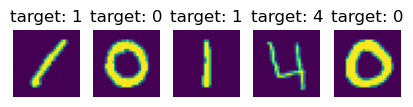

In [9]:
n_samples = 5
f, ax  = plt.subplots(1,n_samples, figsize=(n_samples, 5))

for i in range(n_samples):
    ax[i].imshow(X_train.loc[i, :].values.reshape(28,28))
    ax[i].axis('off')
    ax[i].set_title('target: '+str(y_train[i]))

Here is the description of the MLPClassifier and its init parameters

In [5]:
print(MLPClassifier.__doc__)
print(MLPClassifier.__init__.__doc__)


    MLP multi-class classifier with linear layers and softmax 
    as the activation function for the last layer and cross-entropy
    as the loss function
    

        input_size: int; size of 1 instance of data (X)
        
        output_size: int; size of the prediction vector
        
        n_layers: int; number of layers in the network
        
        layer_sizes: list[int], len(layer_sizes) = n_layers - 1; dimensions of layers
        
        loss_fn: str; type of loss function, currently only softmax_cross_entropy is available
        
        activation_fns: str or list[str] (len(list) = n_layers - 1); 
        if str, defines the activation function for all but the last layers, 
        if list, defines activation functions for each layer separately
        


Create a classifier and train it, measure accuracy on the same data (maybe will add cross-validation later)

In [6]:
mlp = MLPClassifier(input_size=X_train.shape[1], output_size=len(set(y_train)), n_layers=2, layer_sizes = [150], activation_fns = 'ReLU')
n_epochs = 20
learning_rate = 1e-2
mlp.fit(X_train.values, y_train, n_epochs = n_epochs, learning_rate=learning_rate, show_progress=1)

Epoch: 1, loss: 0.448, accuracy on train: 0.849
Epoch: 2, loss: 0.128, accuracy on train: 0.908
Epoch: 3, loss: 0.158, accuracy on train: 0.929
Epoch: 4, loss: 0.065, accuracy on train: 0.942
Epoch: 5, loss: 0.052, accuracy on train: 0.951
Epoch: 6, loss: 0.029, accuracy on train: 0.958
Epoch: 7, loss: 0.019, accuracy on train: 0.964
Epoch: 8, loss: 0.010, accuracy on train: 0.968
Epoch: 9, loss: 0.006, accuracy on train: 0.972
Epoch: 10, loss: 0.004, accuracy on train: 0.975
Epoch: 11, loss: 0.003, accuracy on train: 0.979
Epoch: 12, loss: 0.002, accuracy on train: 0.981
Epoch: 13, loss: 0.001, accuracy on train: 0.984
Epoch: 14, loss: 0.001, accuracy on train: 0.985
Epoch: 15, loss: 0.000, accuracy on train: 0.987
Epoch: 16, loss: 0.000, accuracy on train: 0.989
Epoch: 17, loss: 0.000, accuracy on train: 0.990
Epoch: 18, loss: 0.000, accuracy on train: 0.991
Epoch: 19, loss: 0.000, accuracy on train: 0.992
Epoch: 20, loss: 0.000, accuracy on train: 0.993


Plot metrics

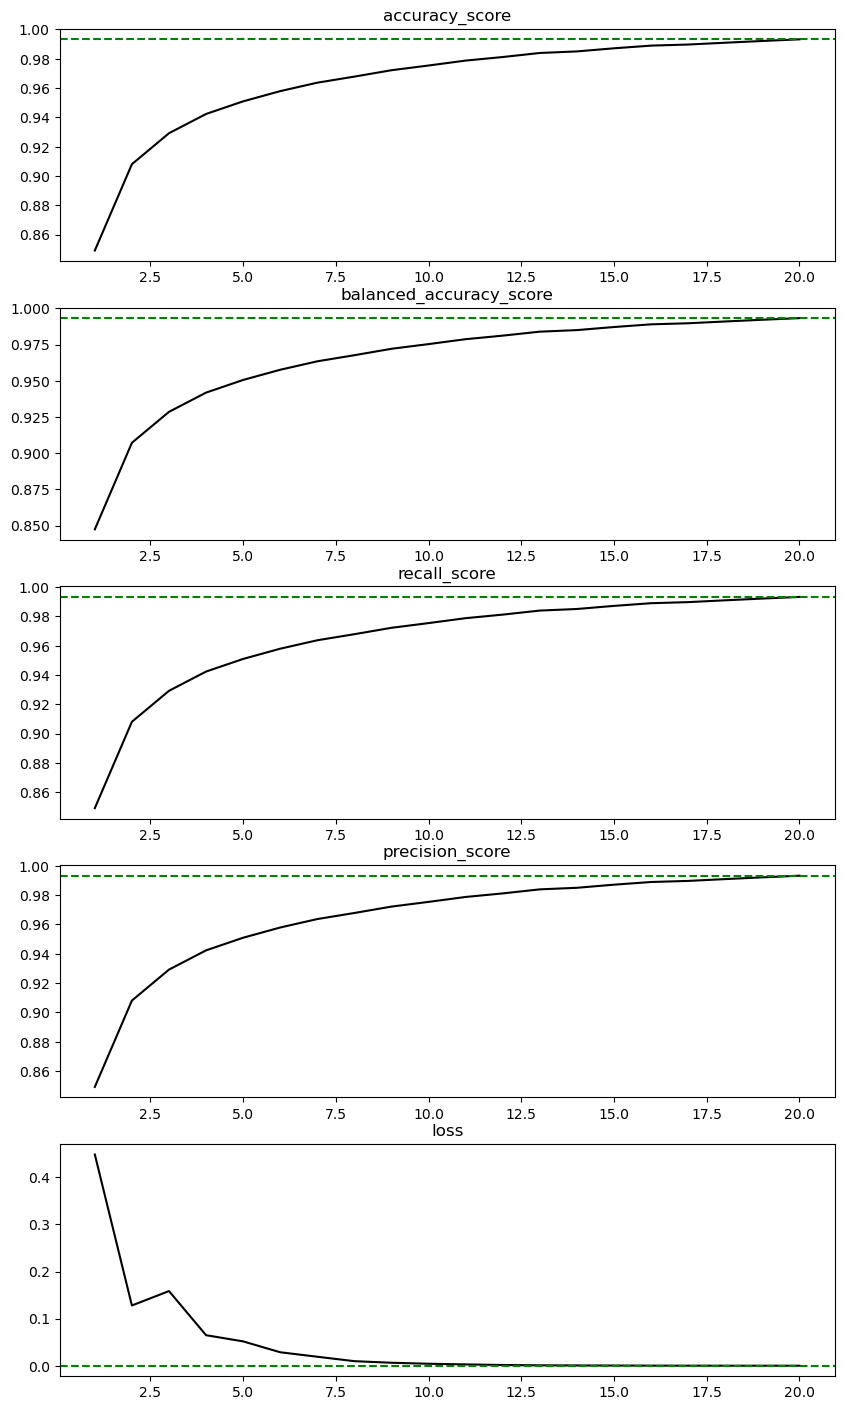

In [16]:
n_metrics = len(mlp.metrics)
_, ax = plt.subplots(n_metrics, 1, figsize=(10, 3.5*n_metrics))
for i, metric in enumerate(mlp.metrics):
    ax[i].plot(range(1, n_epochs + 1), mlp.metrics[metric], color='k')
    ax[i].axhline(mlp.metrics[metric][-1], linestyle='--', color='g')
    ax[i].set_title(metric)

Make and save a prediction on the test data

In [99]:
X_test = pd.read_csv('test.csv')
y_pred = mlp.predict(X_test.values)
y_pred = pd.DataFrame(y_pred, columns= ['Label'])
y_pred.index += 1
y_pred['Label'].to_csv('submission.csv', index_label='ImageId')

Best accuracy achieved was 0.94242